## Sentiment of tweets about the 2023 recession

### 1.Overview

The COVID-19 pandemic's economic impacts have raised concerns about a potential recession in 2023, and analyzing tweets about this topic on platforms like Twitter can provide insights into public sentiment and emerging trends.

### 2.Target

To understand the sentiment of tweets about the 2023 recession, analyze the recurring words and phrases used in these tweets and their impact on the overall sentiment.

### 3.Data set information:

For this project we will use Tweets about Recession in India 2023 from kaggle (https://www.kaggle.com/datasets/aiotsir/tweets-about-recession-in-india-2023).

The dataset was created by scraping Twitter and contains information dating back to 2009. For our analysis, we will specifically concentrate on the data collected during Q4 2022.

**Attribute Information**

* date: tweet date
* id: web scraping id
* content: India recession tweet
* username: Twitter username
* likeCount: Like counter
* retweetCount: Retweet counter


### 4.Import libraries

In [1]:
# data manipulation
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
# used to read the image file as a NumPy array
import imageio.v2 as imageio
# natural language processing tasks / regular expressions
import nltk, re
# performs sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# visualizing the most common words
from wordcloud import WordCloud
# Avoid LookupError, raised by the NLTK library
# This will download the VADER (Valence Aware Dictionary and sEntiment Reasoner) 
# lexicon, which is commonly used for sentiment analysis.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/cnc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### 5.Import Dataset

Load the 'recession_2023.csv' file and review the contents of the data frame.

In [2]:
# Import DataSet:
df_recession = pd.read_csv('Data/recession_2023.csv')

# Display a random content:
df_recession.sample(n=5)

,date,id,content,username,likeCount,retweetCount
2389,2020-11-12 07:26:24+00:00,1326788421503823881,First time in India\nFirst time under any PM\n...,PrezzVerde,57,7
4626,2015-06-26 15:03:53+00:00,614449007432110088,"World slipping into 1930s style #recession, co...",GoRasika,1,0
1596,2022-06-20 07:22:06+00:00,1538784238756978688,@ianuragthakur They can also look for lots of ...,ndhasmana,0,0
3236,2020-04-15 11:38:09+00:00,1250387936706801664,@sardesairajdeep I won’t be surprised after fe...,JonathanDeGoa,0,1
3210,2020-04-19 05:25:58+00:00,1251743824684212226,#India will enter into a #recession this year ...,ashishktiwari,2,0


In [3]:
#Display DataFrame dimensions:
print('Dataframe Size: ',df_recession.shape)

Dataframe Size:  (5176, 6)


It appears that only the "content" column is required among the six available columns. Additionally, the dataset consists of 5,176 rows, but our focus is specifically on the data from Q4 2022.

### 6.Data Cleaning

In [4]:
#First, consider only rows with date 2022-10-X, 2022-11-X and 2022-12-x:
df_recession=df_recession[df_recession['date']>'2022-10-00']

In [5]:
#Show results:
df_recession

,date,id,content,username,likeCount,retweetCount
0,2022-11-30 04:17:49+00:00,1597807084934172672,📌 @elonmusk begins hiring for Twitter 2.0 afte...,workflexitweets,1,1
1,2022-11-30 02:48:10+00:00,1597784522728558592,"Global Recession से दुनिया हुई बेहाल, लेकिन In...",indilinks,0,0
2,2022-11-29 17:21:57+00:00,1597642029479038976,Will global recession impact India or not? #re...,BizzBuzzNews,0,0
3,2022-11-29 11:40:40+00:00,1597556142213070850,Is Recession In India Coming Soon?\n\nWant to ...,Anubhav74782862,0,0
4,2022-11-29 10:12:57+00:00,1597534071202385922,A report by #realestate data collation &amp; r...,indiaoutbound,1,0
...,...,...,...,...,...,...
587,2022-10-01 05:46:23+00:00,1576086099579240449,#MarketsWithMC | Vinay Jain of Karma Capital s...,moneycontrolcom,2,0
588,2022-10-01 04:39:38+00:00,1576069303438258177,#Flipkart claims that it saved 15k cr of custo...,giriraj_shete,3,0
589,2022-10-01 04:19:36+00:00,1576064260672999425,Why did the super rich lose 78 billion dollars...,jobinindia,0,0
590,2022-10-01 03:18:32+00:00,1576048895557500928,Majority of IT professionals will not consider...,AdvocateIndian,0,0


In [6]:
# Drop columns "date", "id","username", "likeCount", "retweetCount":
df_recession=df_recession.drop(['date','id','username','likeCount','retweetCount'], axis=1)
#Show results:
df_recession

,content
0,📌 @elonmusk begins hiring for Twitter 2.0 afte...
1,"Global Recession से दुनिया हुई बेहाल, लेकिन In..."
2,Will global recession impact India or not? #re...
3,Is Recession In India Coming Soon?\n\nWant to ...
4,A report by #realestate data collation &amp; r...
...,...
587,#MarketsWithMC | Vinay Jain of Karma Capital s...
588,#Flipkart claims that it saved 15k cr of custo...
589,Why did the super rich lose 78 billion dollars...
590,Majority of IT professionals will not consider...


In [7]:
#check for duplicates:
df_recession.duplicated().sum()

6

In [8]:
#Remove duplicates:
df_recession = df_recession.drop_duplicates()

In [9]:
#Check missing values:
df_recession.isna().sum()

content    0
dtype: int64

In [10]:
# Define function "clean_tweet" for Removing 
# links, symbols, and punctuation from tweets
def clean_tweet(text):

    # standardize the text to lowercase
    text = str(text).lower()
    # remove URLs from the text,matched URLs are replaced with an empty string
    text = re.sub(r'https?:\/\/\S+', '', text)
    # It matches any characters that are not alphabets or whitespace 
    # replaced with an empty string
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [11]:
%%time
# Clean the Dataframe for sentiment analysis:
# By using .loc[row_indexer, col_indexer], 
# you explicitly specify that you want to assign values 
# to the original dataframe. This should help alleviate the warning.
df_recession.loc[:, 'content'] = df_recession['content'].apply(clean_tweet)

#Display dataframe after cleaning:
df_recession

CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 9.23 ms


,content
0,elonmusk begins hiring for twitter after fir...
1,global recession india \nglobal...
2,will global recession impact india or not rece...
3,is recession in india coming soon\n\nwant to k...
4,a report by realestate data collation amp rese...
...,...
587,marketswithmc vinay jain of karma capital say...
588,flipkart claims that it saved k cr of customer...
589,why did the super rich lose billion dollars ...
590,majority of it professionals will not consider...


Now we can procede with sentiment analysis.

### 7.Sentiment Analysis:

In [12]:
%%time
# Calculate the polarity score of each tweet
# Add a column "Sentiment" to figure out 
# if tweets are  positive, negative, or neutral

# Create an empty 'Sentiment' column in the dataframe
df_recession['Sentiment'] = ''

# Iterate over each tweet in the 'content' column
for index, row in df_recession['content'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        df_recession.loc[index, 'Sentiment'] = 'Negative'
    elif pos > neg:
        df_recession.loc[index, 'Sentiment'] = 'Positive'
    else:
        df_recession.loc[index, 'Sentiment'] = 'Neutral'

# Show the dataframe
print(df_recession)

<timed exec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                               content Sentiment
0     elonmusk begins hiring for twitter  after fir...  Negative
1    global recession      india           \nglobal...  Negative
2    will global recession impact india or not rece...  Negative
3    is recession in india coming soon\n\nwant to k...  Negative
4    a report by realestate data collation amp rese...  Negative
..                                                 ...       ...
587  marketswithmc  vinay jain of karma capital say...  Negative
588  flipkart claims that it saved k cr of customer...  Positive
589  why did the super rich lose  billion dollars  ...  Positive
590  majority of it professionals will not consider...  Negative
591  india central bank chief das raises interest r...  Negative

[586 rows x 2 columns]
CPU times: user 3.22 s, sys: 0 ns, total: 3.22 s
Wall time: 3.22 s


In [13]:
#Create function to Calculate total numbers and percentages of each sentiment feature:

def count_values(data,feature):
  total = data.loc[:,feature].value_counts(dropna=False)
  percentage = data.loc[:,feature].value_counts(dropna=False, normalize=True)*100

  return pd.concat([total, round(percentage,2)], axis=1, keys=['Total', 'Percentage(%)'])


In [14]:
#Apply function "count_values" to Dataframe:
Summary = count_values(df_recession,'Sentiment')
Summary

,Total,Percentage(%)
Sentiment,,
Negative,480,81.91
Positive,103,17.58
Neutral,3,0.51


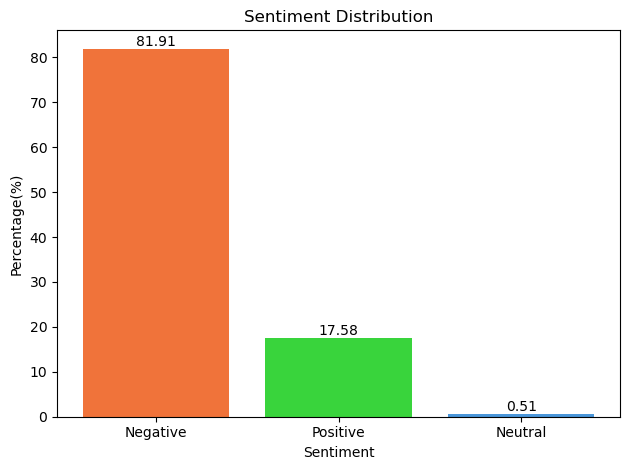

In [15]:
#Plot a bar chart:
labels = Summary.index
sizes = Summary['Percentage(%)']
colors = ['#f0733a', '#39d43c', '#4a96d9']

fig, ax = plt.subplots()
bars = ax.bar(labels, sizes, color=colors)

ax.set_xlabel('Sentiment')
ax.set_ylabel('Percentage(%)')
ax.set_title('Sentiment Distribution')

ax.bar_label(bars, labels=sizes, label_type='edge', color='black')

plt.tight_layout()
plt.show()

### 8.Identify the most common words

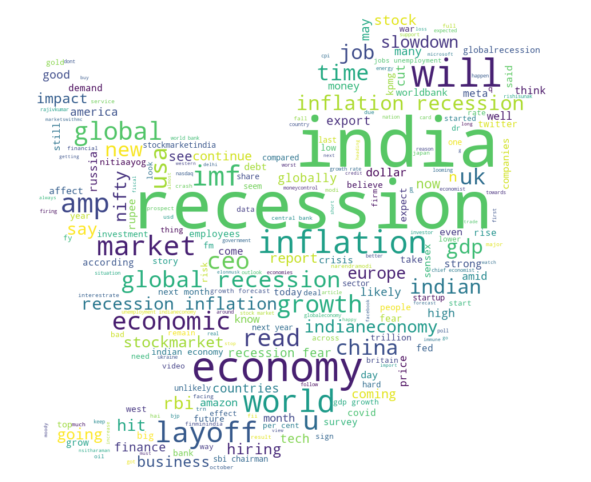

In [16]:
#Show word cloud:
all_tweets = " ".join(tweet for tweet in df_recession['content'])

twitter_mask = imageio.imread('Images/twitter_mask.png')

wordcloud = WordCloud(width=1024, 
                     height=512, 
                     max_words=250, 
                     random_state=42, 
                     max_font_size=120, 
                     background_color='white',
                     mask=twitter_mask).generate(all_tweets)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

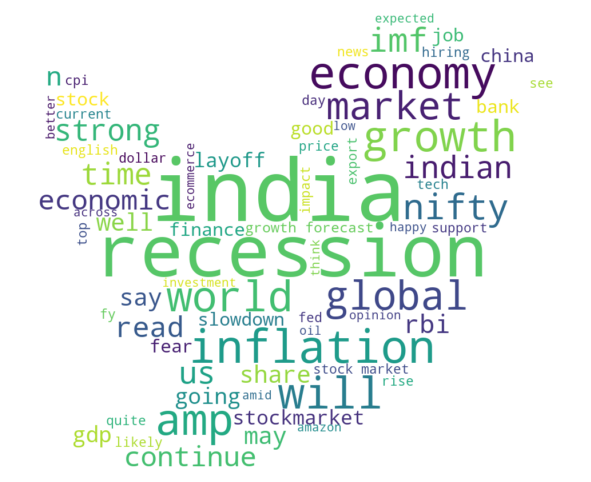

In [17]:
#word cloud for tweets with only positive sentiments
positive_tweets = " ".join(tweet for tweet in df_recession[df_recession['Sentiment'] == 'Positive']['content'])

wordcloud = WordCloud(width=1024, 
                     height=512, 
                     random_state=42,
                     max_words=70, 
                     max_font_size=150, 
                     background_color='white',
                     mask=twitter_mask).generate(positive_tweets)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

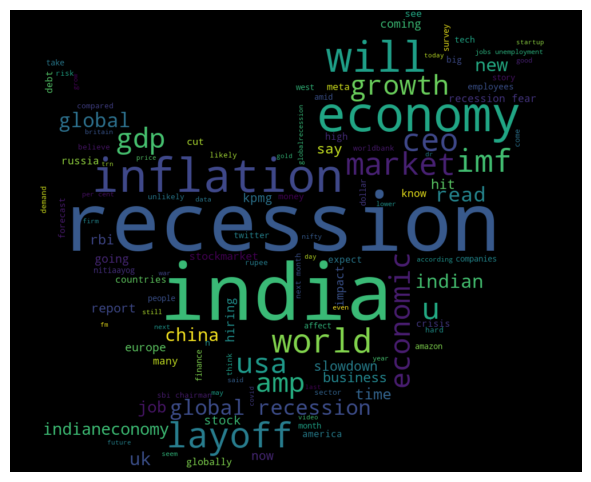

In [18]:
#word cloud for tweets with only negative sentiments
positive_tweets = " ".join(tweet for tweet in df_recession[df_recession['Sentiment'] == 'Negative']['content'])

wordcloud = WordCloud(width=1024, 
                      height=512, 
                      random_state=42,
                      max_words=120, 
                      max_font_size=150, 
                      background_color='black',
                      mask=twitter_mask).generate(positive_tweets)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### 9.Final Observations:

* The sentiment of Indians towards the possible recession of 2023 appears predominantly negative, as indicated by a significant number of negative sentiment tweets.

* Among the tweets analyzed, a noteworthy proportion expressed positive sentiment (17.58%), a small fraction remained neutral (0.51%), while the majority conveyed a negative sentiment (81.91%).

* It is worth highlighting that positive sentiment tweets feature keywords such as 'growth', 'witty', 'strong', 'hiring', and 'better', reflecting an optimistic outlook on India's economic future.

* In contrast, negative sentiment tweets prominently mention keywords like "inflation", "recession", "China", "Russia", "USA", and "Europe", underscoring the significant influence of these factors on the potential economic recession. For instance, factors such as the Russia-Ukraine conflict, economic blockades by the USA and Europe, and conflicts with China contribute to the prevailing negative sentiment.